Num GPUs Available:  1
GPU is available, using GPU for training.
Found 19858 images belonging to 2 classes.
Found 3504 images belonging to 2 classes.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                           

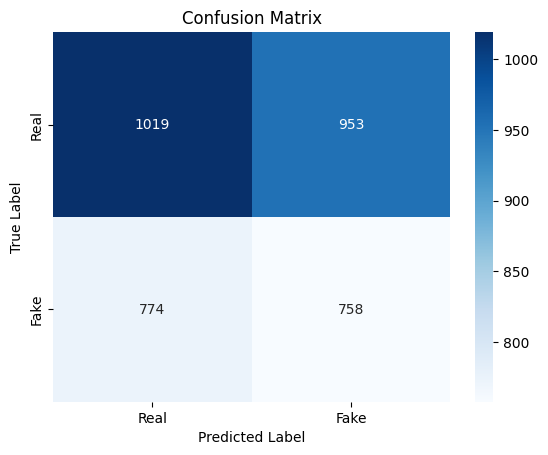

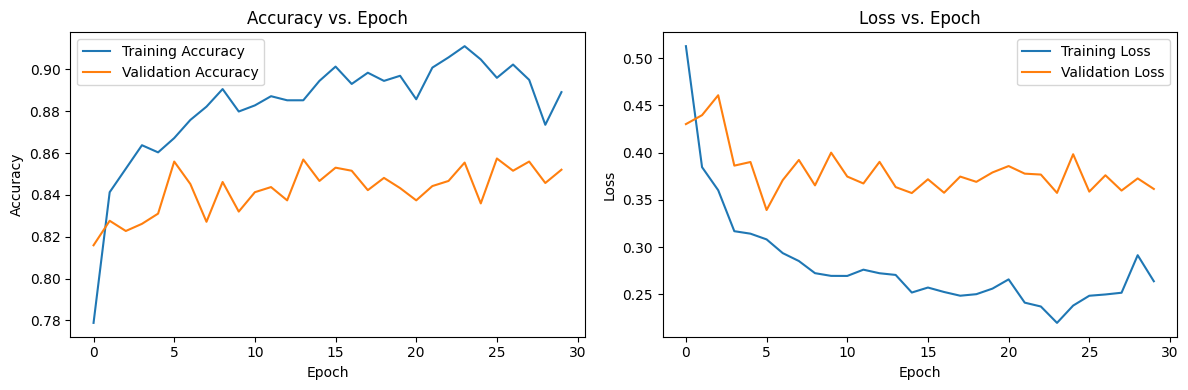

Found 7510 images belonging to 2 classes.
470/470 [==============================] - 73s 152ms/step
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
Classification Report:
              precision    recall  f1-score   support

        Real       0.97      0.92      0.94      3789
        Fake       0.92      0.97      0.94      3721

    accuracy                           0.94      7510
   macro avg       0.94      0.94      0.94      7510
weighted avg       0.94      0.94      0.94      7510

Confusion Matrix:
[[3470  319]
 [ 120 3601]]


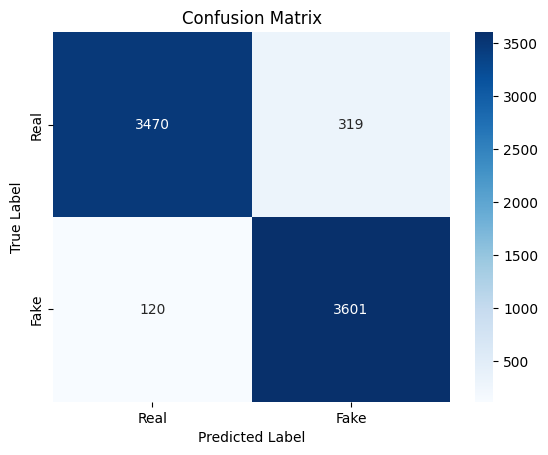

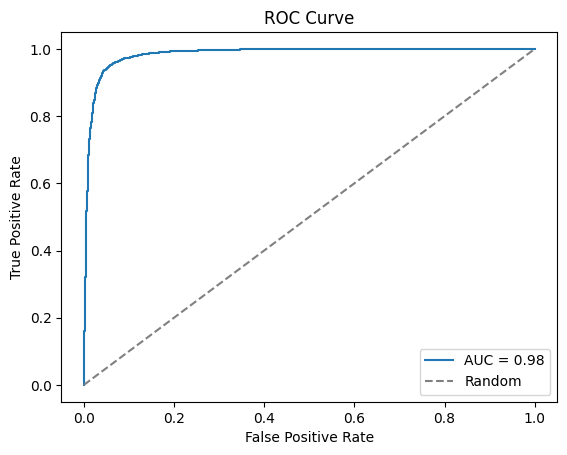

Evaluation Metrics:
accuracy: 0.9415446071904128
precision: 0.9665738161559888
recall: 0.9158089205595144
f1_score: 0.940506843745765
auc: 0.9845855011490638


In [1]:
# --- Xception ---
import model_fit_evaluate 
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as preprocess_input_xception
import tensorflow as tf
import os
import telebot

if __name__ == '__main__':

    data_dir = 'train'
    image_size = (224, 224)
    batch_size = 4 
    epochs = 40

    train_generator, validation_generator = model_fit_evaluate.create_data_generators(data_dir, image_size, batch_size, preprocessing_function=preprocess_input_xception)

    model = model_fit_evaluate.create_custom_model(
    base_model=Xception, 
    weights="imagenet",  
    input_shape=(224, 224, 3), 
    num_classes=1, 
    trainable_base=False 
    )

    # Train Model
    history = model_fit_evaluate.train_model(model, train_generator, validation_generator, epochs, batch_size, early_stopping_patience=6, reduce_lr_patience=2, reduce_lr_factor=0.5)

    # Evaluate Model
    model_fit_evaluate.evaluate_model(model, validation_generator)

    # Plot Training History
    model_fit_evaluate.plot_training_history(history)
    
    test_data_dir = 'test'

    metrics = model_fit_evaluate.evaluate_model_on_test_data(model, test_data_dir, preprocess_input_xception, image_size=image_size, batch_size=16) #Added Image Size

    print("Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

Found 10110 images belonging to 2 classes.
632/632 [==============================] - 98s 154ms/step
[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]
Classification Report:
              precision    recall  f1-score   support

        Real       0.91      0.61      0.73      5089
        Fake       0.70      0.94      0.80      5021

    accuracy                           0.77     10110
   macro avg       0.81      0.77      0.77     10110
weighted avg       0.81      0.77      0.77     10110

Confusion Matrix:
[[3100 1989]
 [ 305 4716]]


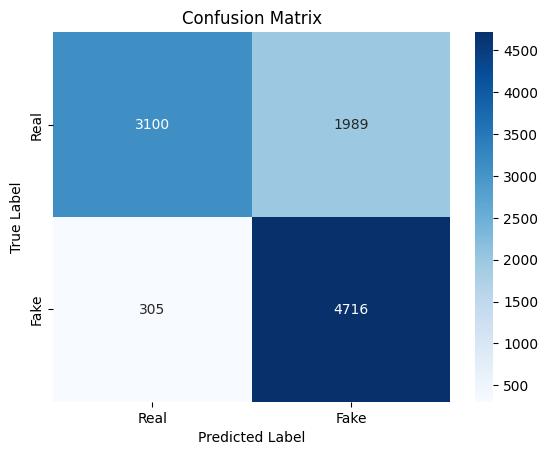

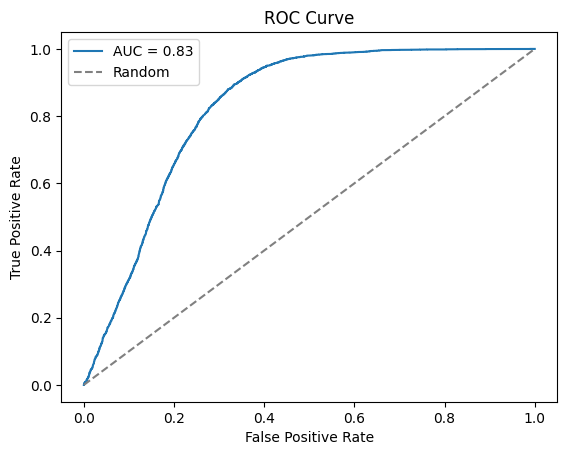

Evaluation Metrics:
accuracy: 0.7730959446092978
precision: 0.9104258443465492
recall: 0.609157005305561
f1_score: 0.7299270072992701
auc: 0.8261258305605745


In [3]:
    metrics = model_fit_evaluate.evaluate_model_on_test_data(model, 'OF/test', preprocess_input_xception, image_size=image_size, batch_size=16) #Added Image Size

    print("Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

In [ ]:
model.save('Xception_Deepfake.keras')